In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
house_df = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/house_sales_data.csv')

In [37]:
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


**Data Manipulation**

In [38]:
house_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [39]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [40]:
house_df.shape

(21613, 21)

In [41]:
house_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [42]:
# Dropping Few Columns

house_df.drop(['id','date'], axis = 1, inplace = True)

In [43]:
house_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


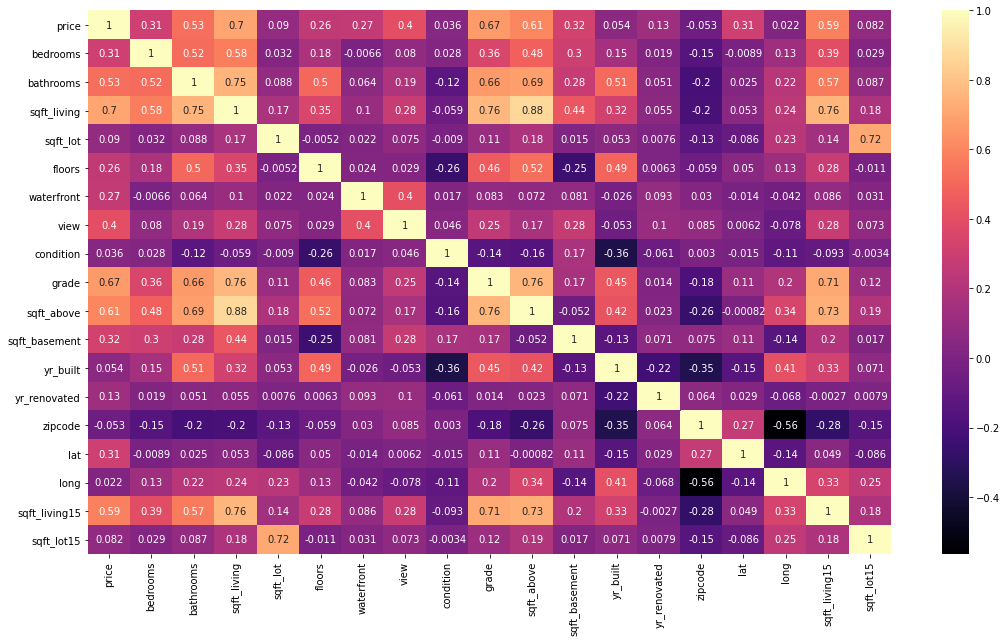

In [44]:
plt.figure(figsize = (18,10))
sns.heatmap(house_df.corr(), annot = True, cmap = 'magma')

In [45]:
house_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [46]:
house_df = house_df.drop(['condition', 'zipcode', 'long', 'sqft_lot15', 'waterfront',	'view', 'sqft_basement',	
                             'yr_renovated'], axis = 1)

In [47]:
house_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,yr_built,lat,sqft_living15
0,221900.0,3,1.00,1180,5650,1.0,7,1180,1955,47.5112,1340
1,538000.0,3,2.25,2570,7242,2.0,7,2170,1951,47.7210,1690
2,180000.0,2,1.00,770,10000,1.0,6,770,1933,47.7379,2720
3,604000.0,4,3.00,1960,5000,1.0,7,1050,1965,47.5208,1360
4,510000.0,3,2.00,1680,8080,1.0,8,1680,1987,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,8,1530,2009,47.6993,1530
21609,400000.0,4,2.50,2310,5813,2.0,8,2310,2014,47.5107,1830
21610,402101.0,2,0.75,1020,1350,2.0,7,1020,2009,47.5944,1020
21611,400000.0,3,2.50,1600,2388,2.0,8,1600,2004,47.5345,1410


**Data Preprocessing**

In [55]:
X = house_df.drop(['price'], axis = 1)

In [56]:
Y = house_df['price']

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [58]:
scaler.fit(X)
X_Scaler = scaler.transform(X)

**Train Test Split**

In [59]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X_Scaler, Y, test_size = 0.2, random_state = 9)

**Linear Regression**

In [62]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression(normalize = True)

In [75]:
lr_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [76]:
lr_model.score(X_test, Y_test)

0.6674847107912398

**Matrics of Regression**

In [77]:
yhat = lr_model.predict(X_test)
display(yhat)

array([ 110120.09826828,  420925.91988126,  409129.93449246, ...,
       1234731.49158783,  158878.66010007,  200167.05012552])

In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [79]:
mean_squared_error(Y_test, yhat)

46542451218.15964

In [80]:
mean_absolute_error(Y_test, yhat)

133315.31965133495

**Decision Tree**

In [189]:
from sklearn.tree import DecisionTreeRegressor

tree_r = DecisionTreeRegressor(random_state = 0, max_depth = 2)

In [190]:
tree_r.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [191]:
tree_r.score(X_train, Y_train)

0.4943012506325072

In [192]:
tree_r.score(X_test, Y_test)

0.5180252646125156

In [193]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [194]:
dot_data = StringIO()
export_graphviz(tree_r, out_file=dot_data, feature_names = list(X.columns), rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

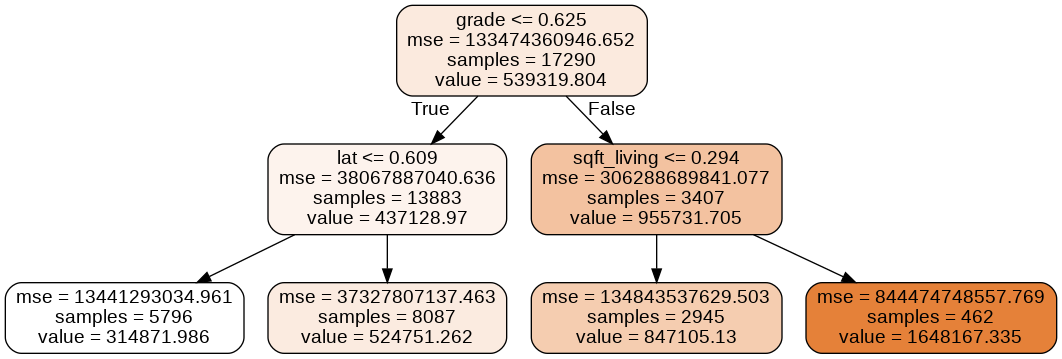

In [195]:
# Width of Graph is very much

Image(graph.create_png())

**Predict The Value**

In [178]:
X_new = [[3,	1.00,	1180,	5950,	1.0,	7,	2580,	1955,	47.5112,	1410]]

In [179]:
X_newScaler = scaler.transform(X_new)

In [180]:
# prediction from LR Model

lr_model.predict(X_newScaler)

array([260271.49180335])

In [181]:
# prediction from Decison Tree

tree_r.predict(X_newScaler)

array([274703.81992337])